In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.api import OLS

In [40]:
df = pd.read_excel(r"C:\Users\Admin\Downloads\nifty_banknifty_15min_data.xlsx", index_col=0)

In [41]:
df.head(2)

,NIFTY,BANKNIFTY
Trade Date & Time,,
2019-02-04 09:29:00,10880.55,26974.85
2019-02-04 09:44:00,10856.70,26912.45


In [42]:
rows = df.count(axis=0)
rows[0]

4500

# Rolling_Hedge_Ratio_Calculation

In [43]:

rolling_window_hedge_ratio = 1000
rolling_window_adf = 1000

a = range(0,rows[0]-rolling_window_hedge_ratio)

date = []
hedge_ratio = []

for i in a:
    model = OLS(df['NIFTY'].iloc[i:i+rolling_window_hedge_ratio], df['BANKNIFTY'].iloc[i:i+rolling_window_hedge_ratio])
    model = model.fit()
    hedge_ratio.append(model.params[0])
    date.append(df.index[i+rolling_window_hedge_ratio])


In [44]:
len(date)

3500

In [45]:
series_hedge_ratio = pd.Series(hedge_ratio, index=date)

In [46]:
series_hedge_ratio

2019-04-03 09:29:00    0.394876
2019-04-03 09:44:00    0.394856
2019-04-03 09:59:00    0.394837
2019-04-03 10:14:00    0.394818
2019-04-03 10:29:00    0.394798
                         ...   
2019-11-01 14:29:00    0.395723
2019-11-01 14:44:00    0.395716
2019-11-01 14:59:00    0.395708
2019-11-01 15:14:00    0.395700
2019-11-01 15:29:00    0.395693
Length: 3500, dtype: float64

In [47]:
df1 = pd.concat([df, series_hedge_ratio], axis = 1)

In [48]:
df1.rename(columns={0:'hedge_ratio'}, inplace=True)

In [49]:
df1.tail(2)

,NIFTY,BANKNIFTY,hedge_ratio
2019-11-01 15:14:00,11922.05,30355.0,0.395700
2019-11-01 15:29:00,11936.15,30405.4,0.395693


In [50]:
df1['spread'] = df1['NIFTY']-(df1['hedge_ratio']*df1['BANKNIFTY'])

In [51]:
df1.tail(2)

,NIFTY,BANKNIFTY,hedge_ratio,spread
2019-11-01 15:14:00,11922.05,30355.0,0.395700,-89.438368
2019-11-01 15:29:00,11936.15,30405.4,0.395693,-95.040496


# Spread / Residual Plot

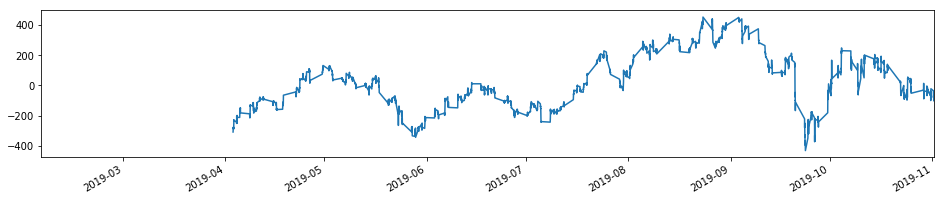

In [52]:
df1.spread.plot(figsize=(16,3))

In [53]:
#df1.to_excel(r"C:\Users\Admin\Downloads\nifty_banknifty_eod2.xlsx")

# Rolling_ADF_Calculation

In [54]:

b = range(rolling_window_adf,rows[0]-rolling_window_adf)

date_adf = []
adf_list = []

for i in b:
    
    adf = adfuller(df1['spread'].iloc[i:i+rolling_window_adf], maxlag=1)
    adf_list.append(adf[0])
    date_adf.append(df1.index[i+rolling_window_adf])   

In [55]:
len(date_adf)

2500

In [56]:
series_adf = pd.Series(adf_list, index=date_adf)

In [57]:
series_adf

2019-06-04 09:29:00   -1.900147
2019-06-04 09:44:00   -1.817102
2019-06-04 09:59:00   -1.792332
2019-06-04 10:14:00   -1.793391
2019-06-04 10:29:00   -1.804340
                         ...   
2019-11-01 14:29:00   -1.997306
2019-11-01 14:44:00   -2.001903
2019-11-01 14:59:00   -1.985719
2019-11-01 15:14:00   -2.019625
2019-11-01 15:29:00   -1.950746
Length: 2500, dtype: float64

In [58]:
df2 = pd.concat([df1, series_adf], axis = 1)
df2.rename(columns={0:'adf'}, inplace=True)

In [59]:
df2.tail(2)

,NIFTY,BANKNIFTY,hedge_ratio,spread,adf
2019-11-01 15:14:00,11922.05,30355.0,0.395700,-89.438368,-2.019625
2019-11-01 15:29:00,11936.15,30405.4,0.395693,-95.040496,-1.950746


# MOVING AVERAGE & MOVING STANDARD DEVIATION

In [60]:
df2['Moving_Average'] = df2['spread'].rolling(1000).mean()
df2['Moving_Std'] = df2['spread'].rolling(1000).std()
df2.tail(2)

,NIFTY,BANKNIFTY,hedge_ratio,spread,adf,Moving_Average,Moving_Std
2019-11-01 15:14:00,11922.05,30355.0,0.395700,-89.438368,-2.019625,72.073510,185.768591
2019-11-01 15:29:00,11936.15,30405.4,0.395693,-95.040496,-1.950746,71.582114,185.559745


In [61]:
df2['upper_band'] = df2['Moving_Average']+2*df2['Moving_Std']
df2['lower_band'] = df2['Moving_Average']-2*df2['Moving_Std']

#Long_Position

In [62]:
df2['long_entry'] = df2['spread'] < df2['lower_band']
df2['long_exit'] = df2['spread'] >= df2['Moving_Average']

In [63]:
df2.tail(2)

,NIFTY,BANKNIFTY,hedge_ratio,spread,adf,Moving_Average,Moving_Std,upper_band,lower_band,long_entry,long_exit
2019-11-01 15:14:00,11922.05,30355.0,0.395700,-89.438368,-2.019625,72.073510,185.768591,443.610692,-299.463672,False,False
2019-11-01 15:29:00,11936.15,30405.4,0.395693,-95.040496,-1.950746,71.582114,185.559745,442.701605,-299.537376,False,False


In [64]:
df2['positions_long'] = np.nan

In [65]:
df2.loc[df2.long_entry, 'positions_long'] = 1
df2.loc[df2.long_exit, 'positions_long'] = 0

In [66]:
df2.tail(2)

,NIFTY,BANKNIFTY,hedge_ratio,spread,adf,Moving_Average,Moving_Std,upper_band,lower_band,long_entry,long_exit,positions_long
2019-11-01 15:14:00,11922.05,30355.0,0.395700,-89.438368,-2.019625,72.073510,185.768591,443.610692,-299.463672,False,False,NaN
2019-11-01 15:29:00,11936.15,30405.4,0.395693,-95.040496,-1.950746,71.582114,185.559745,442.701605,-299.537376,False,False,NaN


In [67]:
df2['positions_long'] = df2['positions_long'].fillna(method = 'ffill')

#Short_Position

In [68]:
df2['short_entry'] = df2['spread'] > df2['upper_band']
df2['short_exit'] = df2['spread'] < df2['Moving_Average']
df2['positions_short'] = np.nan
df2.loc[df2.short_entry, 'positions_short'] = 1
df2.loc[df2.short_exit, 'positions_short'] = 0

df2['positions_short'] = df2['positions_short'].fillna(method = 'ffill')

In [69]:
df2['positions'] = df2['positions_long'] + df2['positions_short']

In [70]:
df2['spread_difference'] = df2['spread'] - df2['spread'].shift(1)
df2['pnl'] = df2['positions'].shift(1) * df2['spread_difference']
df2['cumulative_pnl'] = df2['pnl'].cumsum()

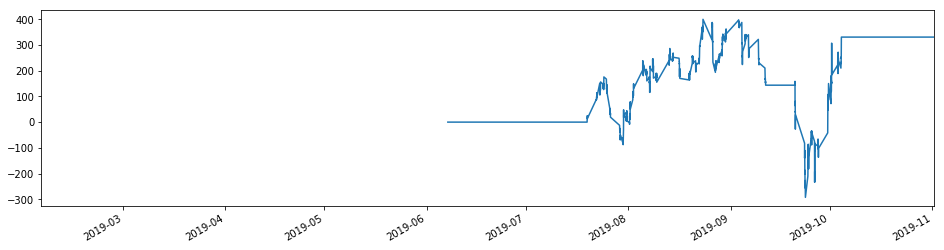

In [71]:
df2['cumulative_pnl'].plot(figsize=(16,4))

In [73]:
#df2.to_excel(r"C:\Users\Admin\Downloads\nifty_banknifty_eod3.xlsx")